In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
OP_Outpatient_data = pd.read_csv('Datasets/OP_Outpatientdata.csv') 
IP_Inpatient_data = pd.read_csv('Datasets/IN_Inpatientdata.csv') 
BE_Beneficiary_data = pd.read_csv('Datasets/BE_BeneficiaryData.csv') 
Provider_data = pd.read_csv('Datasets/P_Provider.csv') 

In [3]:
# Extracting statistical information using NumPy.
#Defining a Function to calculate Outliers Value in a Particular column.

def print_statistical_info(df,ColumnName):
    
    print("Boxplot of :",ColumnName)
    plt.boxplot(df[ColumnName], vert=False)
    plt.show()

    colvalues = df[ColumnName]
    quartiles = np.percentile(colvalues, [25, 50, 75])
    lower_bound_outlier = quartiles[0] - 1.5 * (quartiles[2] - quartiles[0])
    upper_bound_outlier = quartiles[2] + 1.5 * (quartiles[2] - quartiles[0])

    print("\n Statistical Information from the Box Plot is As Follows:")
    print("\n Minimum value of the column is :",colvalues.min())
    print("\n Q1 (25th percentile):",quartiles[0])
    print("\n Median (50th percentile):",quartiles[1])
    print("\n Q3 (75th percentile):",quartiles[2])
    print("\n Maximum value of the column is:",colvalues.max())
    print("\n Lower Bound for Outliers:",lower_bound_outlier)
    print("\n Upper Bound for Outliers:",upper_bound_outlier)

    # Identify potential outliers
    outliers = colvalues[(colvalues < lower_bound_outlier) | (colvalues  > upper_bound_outlier)]
    print("\n Potential Outliers of :",ColumnName)
    return outliers

In [4]:
#---BE_Beneficiary_data----

In [5]:
BE_Beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [6]:
# Displaying information about the columns in BE_Beneficiary_data
print('BE_Beneficiary_data Info:', BE_Beneficiary_data.info())

# Displaying the shape and number of records in BE_Beneficiary_data
print('Shape & Records of BE_Beneficiary_data:', BE_Beneficiary_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
# Checking for the presence of duplicate rows in BE_Beneficiary_data
print(BE_Beneficiary_data.duplicated().any())

False


In [8]:
# Filling NaN values with 0 in the BE_Beneficiary_data
BE_Beneficiary_data=BE_Beneficiary_data.fillna(0)

Boxplot of : NoOfMonths_PartACov


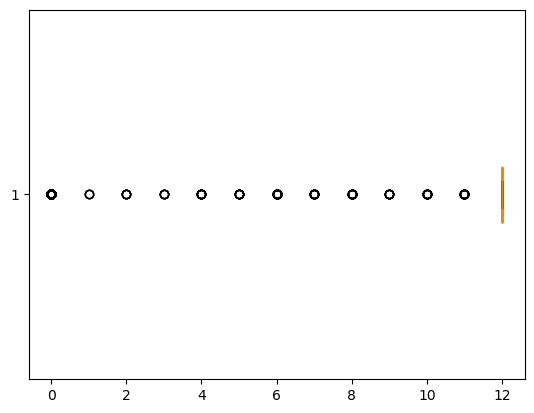


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 12.0

 Median (50th percentile): 12.0

 Q3 (75th percentile): 12.0

 Maximum value of the column is: 12

 Lower Bound for Outliers: 12.0

 Upper Bound for Outliers: 12.0

 Potential Outliers of : NoOfMonths_PartACov
44        0
254       0
299       0
401       0
650       3
         ..
138007    9
138180    0
138290    0
138358    0
138396    7
Name: NoOfMonths_PartACov, Length: 1167, dtype: int64


In [9]:
#Finding Outliers in BE_Beneficiary_data in No of Months of Coverage in Part A.
#Calling the Function and Printing the specific Values.

X_Part_A=print_statistical_info(BE_Beneficiary_data,'NoOfMonths_PartACov')
print(X_Part_A)

In [10]:
#Replacing Outliers in BE_Beneficiary_data in No of Months of Coverage Part A.
#This method involves capping the outliers at the maximum or minimum value within the valid range.
Index_A=X_Part_A.index
for i in Index_A:
    BE_Beneficiary_data.loc[i, 'NoOfMonths_PartACov'] = BE_Beneficiary_data['NoOfMonths_PartACov'].min()
BE_Beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,0,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,0,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,0,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,0,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,0,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,0,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,0,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,0,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,0,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


Boxplot of : NoOfMonths_PartBCov


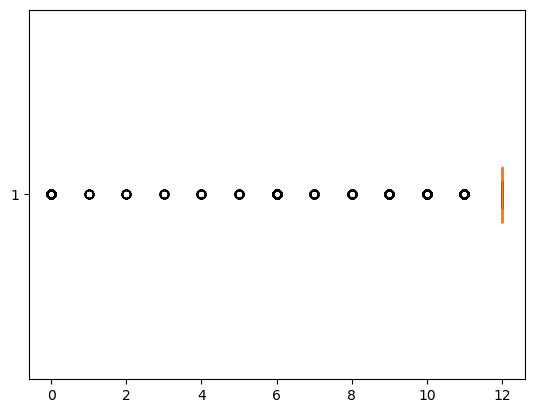


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 12.0

 Median (50th percentile): 12.0

 Q3 (75th percentile): 12.0

 Maximum value of the column is: 12

 Lower Bound for Outliers: 12.0

 Upper Bound for Outliers: 12.0

 Potential Outliers of : NoOfMonths_PartBCov
134        0
155        1
308        0
392        9
486       11
          ..
138095    11
138188     0
138211     6
138298     6
138411    10
Name: NoOfMonths_PartBCov, Length: 1654, dtype: int64


In [11]:
#Finding Outliers in BE_Beneficiary_data in No of Months of Coverage of Part B.
#Calling the Function and Printing the specific Values.
X_Part_B=print_statistical_info(BE_Beneficiary_data,'NoOfMonths_PartBCov')
print(X_Part_B)

In [12]:
#Replacing Outliers in BE_Beneficiary_data in No of Months of Coverage Part B.
#Replacing outliers with the maximum or minimum value within the valid range.
Index_B=X_Part_B.index
for i in Index_B:
    BE_Beneficiary_data.loc[i,'NoOfMonths_PartBCov'] = BE_Beneficiary_data['NoOfMonths_PartBCov'].min()
BE_Beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,0,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,0,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,0,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,0,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,0,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,0,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,0,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,0,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,0,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


Boxplot of : IPAnnualReimbursementAmt


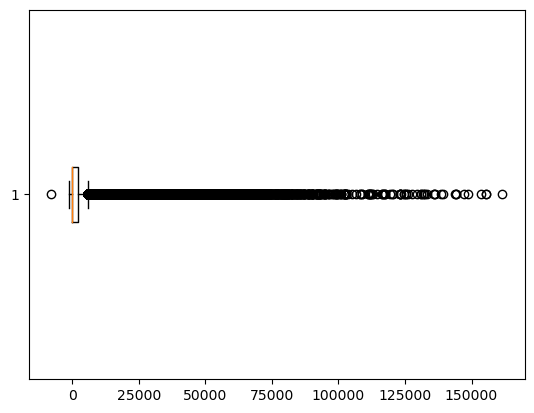


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : -8000

 Q1 (25th percentile): 0.0

 Median (50th percentile): 0.0

 Q3 (75th percentile): 2280.0

 Maximum value of the column is: 161470

 Lower Bound for Outliers: -3420.0

 Upper Bound for Outliers: 5700.0

 Potential Outliers of : IPAnnualReimbursementAmt
0         36000
13        21260
16        22000
17         8000
26         6000
          ...  
138518     6160
138524    17140
138525    11400
138535     8000
138546    15800
Name: IPAnnualReimbursementAmt, Length: 26044, dtype: int64


In [13]:
#Finding Outliers in BE_Beneficiary_data in IPAnnualReimbursementAmt.
#Calling the Function and Printing the specific Values.
X_IPAR=print_statistical_info(BE_Beneficiary_data,'IPAnnualReimbursementAmt')
print(X_IPAR)

In [14]:
#Replacing Outliers in BE_Beneficiary_data in  with IPAnnualReimbursementAmt the upper Bound of the outlier .
Index_IPAR=X_IPAR.index
IPAR_Median=BE_Beneficiary_data['IPAnnualReimbursementAmt'].median()
for i in Index_IPAR:
    BE_Beneficiary_data.loc[i,'IPAnnualReimbursementAmt'] = IPAR_Median
BE_Beneficiary_data['IPAnnualReimbursementAmt']

0            0
1            0
2            0
3            0
4            0
          ... 
138551       0
138552       0
138553    2000
138554       0
138555       0
Name: IPAnnualReimbursementAmt, Length: 138556, dtype: int64

Boxplot of : IPAnnualDeductibleAmt


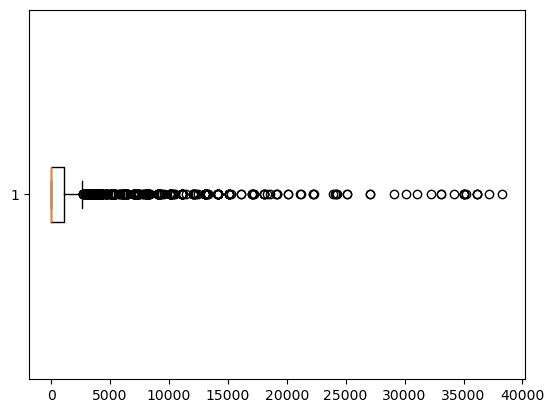


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 0.0

 Median (50th percentile): 0.0

 Q3 (75th percentile): 1068.0

 Maximum value of the column is: 38272

 Lower Bound for Outliers: -1602.0

 Upper Bound for Outliers: 2670.0

 Potential Outliers of : IPAnnualDeductibleAmt
0         3204
165       6068
270       7068
278       3204
319       3204
          ... 
138279    5068
138334    3204
138343    5068
138409    4272
138443    3204
Name: IPAnnualDeductibleAmt, Length: 2717, dtype: int64


In [15]:
#Finding Outliers in BE_Beneficiary_data in IPAnnualDeductibleAmt.
#Calling the Function and Printing the specific Values.
X_IPAD=print_statistical_info(BE_Beneficiary_data,'IPAnnualDeductibleAmt')
print(X_IPAD)

In [16]:
#Replacing Outliers in BE_Beneficiary_data in IPAnnualDeductibleAmt with the upper Bound of the outlier .
Index_IPAD=X_IPAD.index
IPAD_Median=BE_Beneficiary_data['IPAnnualDeductibleAmt'].median()
for i in Index_IPAD:
    BE_Beneficiary_data.loc[i,'IPAnnualDeductibleAmt'] = IPAD_Median
BE_Beneficiary_data['IPAnnualDeductibleAmt']

0            0
1            0
2            0
3            0
4            0
          ... 
138551       0
138552       0
138553    1068
138554       0
138555       0
Name: IPAnnualDeductibleAmt, Length: 138556, dtype: int64

Boxplot of : OPAnnualReimbursementAmt


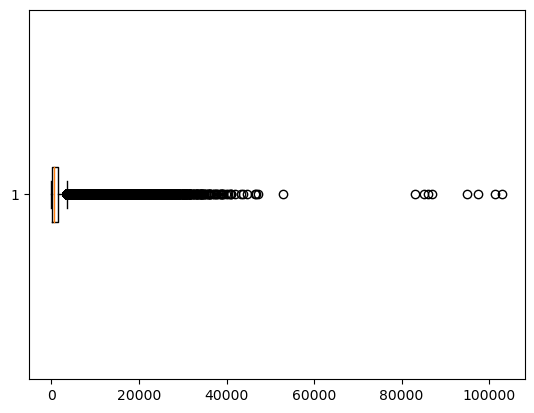


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : -70

 Q1 (25th percentile): 170.0

 Median (50th percentile): 570.0

 Q3 (75th percentile): 1500.0

 Maximum value of the column is: 102960

 Lower Bound for Outliers: -1825.0

 Upper Bound for Outliers: 3495.0

 Potential Outliers of : OPAnnualReimbursementAmt
23        14590
52         3800
68         4460
73         3750
88        33210
          ...  
138514     5420
138520    10720
138541     4700
138546     6140
138555     5470
Name: OPAnnualReimbursementAmt, Length: 11612, dtype: int64


In [17]:
#Finding Outliers in BE_Beneficiary_data in OPAnnualReimbursementAmt .
#Calling the Function and Printing the specific Values.
X_OPA=print_statistical_info(BE_Beneficiary_data,'OPAnnualReimbursementAmt')
print(X_OPA)

In [18]:
#Replacing Outliers in Train_beneficiary_data in OPAnnualReimbursementAmt with the upper Bound of the outlier .
Index_OPAR=X_OPA.index
OPAR_Median=BE_Beneficiary_data['OPAnnualReimbursementAmt'].median()
for i in Index_OPAR:
    BE_Beneficiary_data.loc[i,'OPAnnualReimbursementAmt']=OPAR_Median
BE_Beneficiary_data['OPAnnualReimbursementAmt']

0           60
1           30
2           90
3         1810
4         1790
          ... 
138551     430
138552     880
138553    3240
138554    2650
138555     570
Name: OPAnnualReimbursementAmt, Length: 138556, dtype: int64

Boxplot of : OPAnnualDeductibleAmt


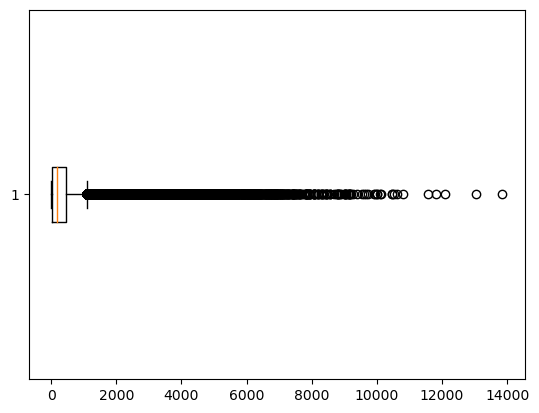


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 40.0

 Median (50th percentile): 170.0

 Q3 (75th percentile): 460.0

 Maximum value of the column is: 13840

 Lower Bound for Outliers: -590.0

 Upper Bound for Outliers: 1090.0

 Potential Outliers of : OPAnnualDeductibleAmt
4         1200
11        1740
15        1480
23        3160
56        1580
          ... 
138532    1300
138534    1110
138541    1730
138553    1390
138555    1870
Name: OPAnnualDeductibleAmt, Length: 12020, dtype: int64


In [19]:
#Finding Outliers in BE_Beneficiary_data in  OPAnnualDeductibleAmt.
#Calling the Function and Printing the specific Values.
X_OPAD=print_statistical_info(BE_Beneficiary_data,'OPAnnualDeductibleAmt')
print(X_OPAD)

In [20]:
#Replacing Outliers in BE_Beneficiary_data in OPAnnualDeductibleAmt with the upper Bound of the outlier .
Index_OPAD=X_OPAD.index
OPAD_Median=BE_Beneficiary_data['OPAnnualDeductibleAmt'].median()
for i in Index_OPAD:
    BE_Beneficiary_data.loc[i,'OPAnnualDeductibleAmt']=OPAD_Median
BE_Beneficiary_data['OPAnnualDeductibleAmt']

0          70
1          50
2          40
3         760
4         170
         ... 
138551    460
138552    100
138553    170
138554     10
138555    170
Name: OPAnnualDeductibleAmt, Length: 138556, dtype: int64

In [21]:
# Print statement to check and display the count of missing values in each column of BE_Beneficiary_data
print('Lets check and display the count of missing values in each column of BE_Beneficiary_data:\n', BE_Beneficiary_data.isna().sum())

Lets check and display the count of missing values in each column of BE_Beneficiary_data:
 BeneID                             0
DOB                                0
DOD                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt

In [22]:
BE_Beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,0,1,1,0,39,230,12,12,...,1,1,1,2,1,1,0,0,60,70
1,BENE11002,1936-09-01,0,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,0,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,0,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,0,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,0,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,0,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,0,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,170
138554,BENE159197,1930-01-01,0,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [23]:
#---OP_Outpatient_data----

In [24]:
OP_Outpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [25]:
# Displaying information about the columns in OP_Outpatient_data
print('OP_Outpatient_data Info:', OP_Outpatient_data.info())

# Displaying the shape and number of records in OP_Outpatient_data
print('Shape & Records of OP_Outpatient_data:', OP_Outpatient_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [26]:
# Checking for the presence of duplicate rows in OP_Outpatient_data
print(OP_Outpatient_data.duplicated().any())

False


Boxplot of : InscClaimAmtReimbursed


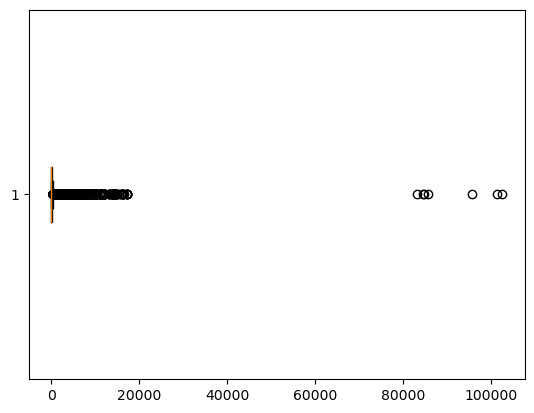


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 40.0

 Median (50th percentile): 80.0

 Q3 (75th percentile): 200.0

 Maximum value of the column is: 102500

 Lower Bound for Outliers: -200.0

 Upper Bound for Outliers: 440.0

 Potential Outliers of : InscClaimAmtReimbursed
9          500
17        1300
23         500
45        1100
59         900
          ... 
517685    1600
517718     500
517721     800
517726    3300
517732     800
Name: InscClaimAmtReimbursed, Length: 78375, dtype: int64


In [27]:
#Finding the Outliers in Train_outpatient_data in InscClaimAmtReimbursed.
#Calling the Function and Printing the specific Values.

OP_Insc=print_statistical_info(OP_Outpatient_data,'InscClaimAmtReimbursed')
print(OP_Insc)

In [28]:
#Replacing Outliers in Train_outpatient_data in InscClaimAmtReimbursed.
#This method involves replacing the outliers with upper bound.
OP_Insc_Index=OP_Insc.index
for i in OP_Insc_Index:
    OP_Outpatient_data.loc[i, 'InscClaimAmtReimbursed'] = 440
OP_Outpatient_data['InscClaimAmtReimbursed']

0          30
1          80
2          10
3          40
4         200
         ... 
517732    440
517733    400
517734     60
517735     70
517736     80
Name: InscClaimAmtReimbursed, Length: 517737, dtype: int64

In [29]:
# Print statement to check and display the count of missing values in each column of OP_Outpatient_data
print('Lets check and display the count of missing values in each column of OP_Outpatient_data:\n', OP_Outpatient_data.isna().sum())

Lets check and display the count of missing values in each column of OP_Outpatient_data:
 BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


In [30]:
OP_Outpatient_data['AttendingPhysician'] = OP_Outpatient_data['AttendingPhysician'].fillna("None")
OP_Outpatient_data['OperatingPhysician'] = OP_Outpatient_data['OperatingPhysician'].fillna("None")
OP_Outpatient_data['OtherPhysician'] = OP_Outpatient_data['OtherPhysician'].fillna("None")

In [31]:
# Filling NaN values with 0 in the OP_Outpatient_data to handle missing data
OP_Outpatient_data=OP_Outpatient_data.fillna(0)

In [32]:
OP_Outpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,440,PHY364188,PHY364188,PHY385752,2163,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,None,07041,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,None,None,V570,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,None,PHY419379,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [33]:
#---IP_Inpatient_data----

In [34]:
IP_Inpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Displaying information about the columns in IP_Inpatient_data
print('Inpatient_data Info:', IP_Inpatient_data.info())

# Displaying the shape and number of records in IP_Inpatient_data
print('Shape & Records of Inpatient_data:', IP_Inpatient_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [36]:
# Checking for the presence of duplicate rows in IP_Inpatient_data
print(IP_Inpatient_data.duplicated().any())

False


Boxplot of : InscClaimAmtReimbursed


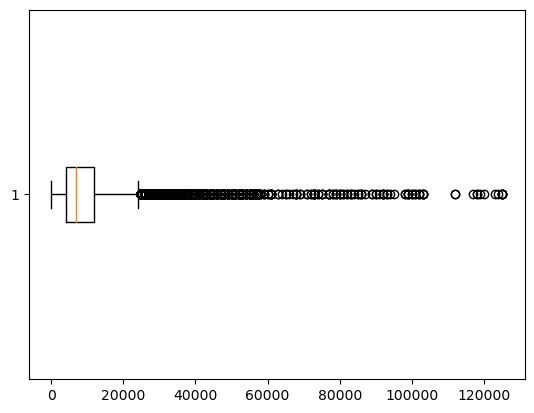


 Statistical Information from the Box Plot is As Follows:

 Minimum value of the column is : 0

 Q1 (25th percentile): 4000.0

 Median (50th percentile): 7000.0

 Q3 (75th percentile): 12000.0

 Maximum value of the column is: 125000

 Lower Bound for Outliers: -8000.0

 Upper Bound for Outliers: 24000.0

 Potential Outliers of : InscClaimAmtReimbursed
0         26000
9         29000
10       102000
11        30000
48        47000
          ...  
40397     34000
40398     25000
40426     57000
40430     30000
40444     47000
Name: InscClaimAmtReimbursed, Length: 2966, dtype: int64


In [37]:
#Finding the Outliers in Train_inpatient_data in InscClaimAmtReimbursed.
#Calling the Function and Printing the specific Values.

IP_Insc=print_statistical_info(IP_Inpatient_data,'InscClaimAmtReimbursed')
print(IP_Insc)

In [38]:
#Replacing Outliers in Train_inpatient_data in InscClaimAmtReimbursed.
#This method involves replacing the outliers with Median.
IP_Insc_Index=IP_Insc.index
for i in IP_Insc_Index:
    IP_Inpatient_data.loc[i, 'InscClaimAmtReimbursed'] = 7000
IP_Inpatient_data['InscClaimAmtReimbursed']

0         7000
1         5000
2         5000
3         5000
4        10000
         ...  
40469     7000
40470     4000
40471     3000
40472     5000
40473    15000
Name: InscClaimAmtReimbursed, Length: 40474, dtype: int64

In [39]:
# Print statement to check and display the count of missing values in each column of IP_Inpatient_data
print('Lets check the missing values in IP_Inpatient_data for each column::\n',IP_Inpatient_data.isna().sum())

Lets check the missing values in IP_Inpatient_data for each column::
 BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
Cl

In [40]:
IP_Inpatient_data['AttendingPhysician'] = IP_Inpatient_data['AttendingPhysician'].fillna("None")
IP_Inpatient_data['OperatingPhysician'] = IP_Inpatient_data['OperatingPhysician'].fillna("None")
IP_Inpatient_data['OtherPhysician'] = IP_Inpatient_data['OtherPhysician'].fillna("None")

In [41]:
# Filling NaN values with 0 in the IP_Inpatient_data to handle missing data
IP_Inpatient_data = IP_Inpatient_data.fillna(0)

In [42]:
IP_Inpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,None,2009-09-28,...,79092,70704,2869,4148,9904.0,0.0,0.0,0.0,0.0,0.0
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,None,2009-11-03,...,49122,4254,5990,0,8605.0,0.0,0.0,0.0,0.0,0.0
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,None,2009-11-18,...,71534,71590,V4502,0,9390.0,0.0,0.0,0.0,0.0,0.0
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,None,None,2009-12-17,...,4263,0414,41400,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#---Provider_data----

In [44]:
Provider_data

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [45]:
# Displaying information about the columns in Provider_data
print('Provider_data Info :',Provider_data.info())

# Displaying the shape and number of records in Provider_data
print('Shape & Records of Provider_data :',Provider_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
Provider_data Info : None
Shape & Records of Provider_data : (5410, 2)


In [46]:
# Checking for the presence of duplicate rows in Provider_data
print(Provider_data.duplicated().any())

False


In [47]:
# Print statement to check and display the count of missing values in each column of Provider_data
print('Lets check the missing values in Provider_data for each column:\n', Provider_data.isna().sum())

Lets check the missing values in Provider_data for each column:
 Provider          0
PotentialFraud    0
dtype: int64


In [48]:
#--Data cleaning is done---

In [49]:
OP_Outpatient_data.to_pickle("Train_OP_Cleaneddata.csv")
IP_Inpatient_data.to_pickle("Train_IN_Cleaneddata.csv")
BE_Beneficiary_data.to_pickle("Train_BE_Cleaneddata.csv")
Provider_data.to_pickle("Train_PR_Cleaneddata.csv")